In [1]:
# A small script that numerically solves the differential equations for a source 
# and decoder BTC system in the mean field limit.
import numpy as np
from qutip import *
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl
rc('text', usetex=True)
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = "STIX"
mpl.rcParams["mathtext.fontset"] = "stix"
mpl.rcParams["legend.borderpad"] = 0.15
mpl.rcParams["font.size"] = 8

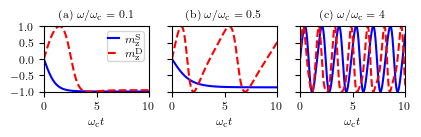

In [2]:
# solve the set of coupled differential equations for the two coupled systems

def BTC2x(y, t, omega, dphi):
    m1x , m1y , m1z , m2x , m2y , m2z = y
    dydt = [m1x*m1z,
            m1y*m1z-omega*m1z, 
            omega*m1y-(m1x**2 + m1y**2),
            m2x*m2z - 2*m1y*m2z*np.sin(dphi) + 2*m1x*m2z*np.cos(dphi), 
            (-1)*omega*m2z+m2z*m2y+2*m1y*m2z*np.cos(dphi)+2*m1x*m2z*np.sin(dphi),
            omega*m2y-2*(m1x*m2x*np.cos(dphi) + m1y*m2y*np.cos(dphi)
                         -m2x*m1y*np.sin(dphi))+ m1x*m2y*np.sin(dphi) - 
            (m2x**2+m2y**2)]
    return dydt

# time interval of solution
tau = np.linspace(0,10,1000)
dphi = np.pi
a=0
m0 = [0, np.sqrt(1-a**2), a, 0, np.sqrt(1-a**2), a]

omega = 0.1
sol1 = odeint(BTC2x, m0, tau, args=(omega, dphi))
omega = 0.5
sol2 = odeint(BTC2x, m0, tau, args=(omega, dphi))
omega = 4
sol3 = odeint(BTC2x, m0, tau, args=(omega, dphi))

fig , (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(1.2*3.54331,0.4*3.54331),
                                   width_ratios=[1,1,1],layout='tight')

ax1.plot(tau, sol1[:, 2], 'b', label=r'$m_\mathrm{z}^\mathrm{S}$')
ax1.plot(tau, sol1[:, 5], 'r--', label=r'$m_\mathrm{z}^\mathrm{D}$')
ax1.legend(loc='best', handlelength=1, 
           handletextpad=0.5, borderpad=0.1, labelspacing=0.2)
ax1.set_xlabel(r'$\omega_\mathrm{c} t$')
ax1.set_ylim(-1.01,1.01)
ax1.set_yticks([-1,-0.5,0,0.5,1])
ax1.set_xlim([0,10])
ax1.set_title(r'(a) $\omega / \omega_\mathrm{c} = 0.1$', fontsize=8)

ax2.plot(tau, sol2[:, 2], 'b', label=r'$m_z^\mathrm{S}$')
ax2.plot(tau, sol2[:, 5], 'r--', label=r'$m_z^\mathrm{D}$')
ax2.set_ylim(-1.01,1.01)
ax2.set_yticks([-1,-0.5,0,0.5,1])
ax2.set_xlim([0,10])
ax2.set_yticks([-1,-0.5,0,0.5,1])
ax2.set_yticklabels(['','','','',''])
ax2.set_xlabel(r'$\omega_\mathrm{c} t$')
ax2.set_title(r'(b) $\omega / \omega_\mathrm{c} = 0.5$', fontsize=8)

ax3.plot(tau, sol3[:, 2], 'b', label=r'$m_z^\mathrm{S}$')
ax3.plot(tau, sol3[:, 5], 'r--', label=r'$m_z^\mathrm{D}$')
ax3.set_ylim(-1.01,1.01)
ax3.set_yticks([-1,-0.5,0,0.5,1])
ax3.set_xlim([0,10])
ax3.set_yticks([-1,-0.5,0,0.5,1])
ax3.set_yticklabels(['','','','',''])
ax3.set_xlabel(r'$\omega_\mathrm{c} t$')
ax3.set_title(r'(c) $\omega / \omega_\mathrm{c} = 4$', fontsize=8)
plt.show()
fig.savefig('cascaded_mean_field.pdf', dpi=1000)